## Sequential Backward Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Backward Selection

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= 1,
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   18.6s finished

[2022-11-03 01:19:24] Features: 21/1 -- score: 0.8499714119503181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   18.2s finished

[2022-11-03 01:19:43] Features: 20/1 -- score: 0.8566340274838657[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.5s finished

[2022-11-03 01:20:00] Features: 19/1 -- score: 0.8496641984684514[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

{22: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([0.82905983, 0.83700441, 0.8173913 , 0.86086957, 0.84716157]),
  'avg_score': 0.8382973351927584,
  'feature_names': ('id_student',
   'gender',
   'region',
   'highest_education',
   'imd_band',
   'age_band',
   'num_of_prev_attempts',
   'studied_credits',
   'disability',
   'total_number_of_click',
   'total_score',
   'externalquiz',
   'forumng',
   'glossary',
   'homepage',
   'oucontent',
   'ouelluminate',
   'ouwiki',
   'page',
   'resource',
   'subpage',
   'url')},
 21: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21),
  'cv_scores': array([0.85232068, 0.84716157, 0.85344828, 0.84347826, 0.85344828]),
  'avg_score': 0.8499714119503181,
  'feature_names': ('id_student',
   'gender',
   'r

In [16]:
forward_feature_selection.k_feature_idx_

(10,)

In [17]:
forward_feature_selection.k_feature_names_

('total_score',)

In [18]:
forward_feature_selection.k_score_

0.8456042734185905

In [26]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("backward.randomforest.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8547008547008547, 0.8584070796460177, 0.834...",0.848123,"(id_student, gender, region, highest_education...",0.011455,0.008912,0.004456
21,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8508771929824561, 0.8660714285714286, 0.840...",0.853607,"(id_student, gender, region, highest_education...",0.023449,0.018244,0.009122
20,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.8547008547008547, 0.8407079646017699, 0.849...",0.851397,"(id_student, gender, region, highest_education...",0.010295,0.00801,0.004005
19,"(0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1...","[0.851063829787234, 0.857142857142857, 0.83620...",0.84749,"(id_student, gender, highest_education, imd_ba...",0.009154,0.007122,0.003561
18,"(0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, ...","[0.8384279475982532, 0.8672566371681415, 0.836...",0.849964,"(id_student, gender, highest_education, imd_ba...",0.015123,0.011766,0.005883
17,"(0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 15, 16, 17, ...","[0.8534482758620691, 0.8458149779735683, 0.841...",0.850689,"(id_student, gender, highest_education, imd_ba...",0.008303,0.00646,0.00323
16,"(0, 1, 3, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, ...","[0.8521739130434782, 0.8584070796460177, 0.838...",0.852901,"(id_student, gender, highest_education, imd_ba...",0.010068,0.007833,0.003917
15,"(0, 1, 3, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, ...","[0.8461538461538463, 0.8454545454545455, 0.850...",0.853846,"(id_student, gender, highest_education, imd_ba...",0.01588,0.012355,0.006177
14,"(0, 3, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, 19,...","[0.8484848484848485, 0.8584070796460177, 0.836...",0.850976,"(id_student, highest_education, imd_band, num_...",0.011611,0.009034,0.004517
13,"(0, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, 19, 21)","[0.8547008547008547, 0.8634361233480177, 0.849...",0.855401,"(id_student, imd_band, num_of_prev_attempts, s...",0.007672,0.005969,0.002984


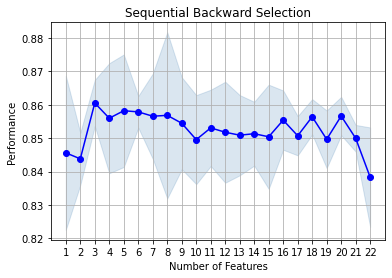

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(),
                                                     k_features= (1,1),
                                                     forward=False,
                                                     floating=False,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   19.0s finished

[2022-11-03 01:22:54] Features: 21/1 -- score: 0.8536072695748477[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   18.2s finished

[2022-11-03 01:23:12] Features: 20/1 -- score: 0.8513969240082094[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   17.3s finished

[2022-11-03 01:23:29] Features: 19/1 -- score: 0.847489873295055[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [22]:
forward_feature_selection.k_feature_names_

('total_score',)

In [23]:
forward_feature_selection.k_score_

0.8465969588940346

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8547008547008547, 0.8584070796460177, 0.834...",0.848123,"(id_student, gender, region, highest_education...",0.011455,0.008912,0.004456
21,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8508771929824561, 0.8660714285714286, 0.840...",0.853607,"(id_student, gender, region, highest_education...",0.023449,0.018244,0.009122
20,"(0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.8547008547008547, 0.8407079646017699, 0.849...",0.851397,"(id_student, gender, region, highest_education...",0.010295,0.00801,0.004005
19,"(0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 1...","[0.851063829787234, 0.857142857142857, 0.83620...",0.84749,"(id_student, gender, highest_education, imd_ba...",0.009154,0.007122,0.003561
18,"(0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 13, 15, 16, ...","[0.8384279475982532, 0.8672566371681415, 0.836...",0.849964,"(id_student, gender, highest_education, imd_ba...",0.015123,0.011766,0.005883
17,"(0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 15, 16, 17, ...","[0.8534482758620691, 0.8458149779735683, 0.841...",0.850689,"(id_student, gender, highest_education, imd_ba...",0.008303,0.00646,0.00323
16,"(0, 1, 3, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, ...","[0.8521739130434782, 0.8584070796460177, 0.838...",0.852901,"(id_student, gender, highest_education, imd_ba...",0.010068,0.007833,0.003917
15,"(0, 1, 3, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, ...","[0.8461538461538463, 0.8454545454545455, 0.850...",0.853846,"(id_student, gender, highest_education, imd_ba...",0.01588,0.012355,0.006177
14,"(0, 3, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, 19,...","[0.8484848484848485, 0.8584070796460177, 0.836...",0.850976,"(id_student, highest_education, imd_band, num_...",0.011611,0.009034,0.004517
13,"(0, 4, 6, 7, 9, 10, 12, 15, 16, 17, 18, 19, 21)","[0.8547008547008547, 0.8634361233480177, 0.849...",0.855401,"(id_student, imd_band, num_of_prev_attempts, s...",0.007672,0.005969,0.002984


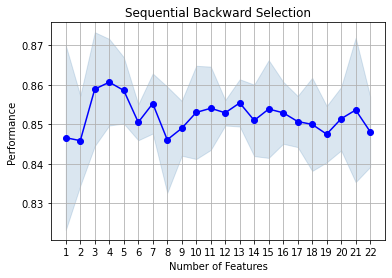

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward Selection')
plt.grid()
plt.show()